In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

Let's see how the data looks like

In [325]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We don't need PassengerId as an input to the model.
And have a quick look at data stats

In [326]:
data.drop('PassengerId', axis=1, inplace=True)
PassengerId = test['PassengerId']
test.drop('PassengerId', axis=1, inplace=True)
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


Check if the gender plays a role in survival

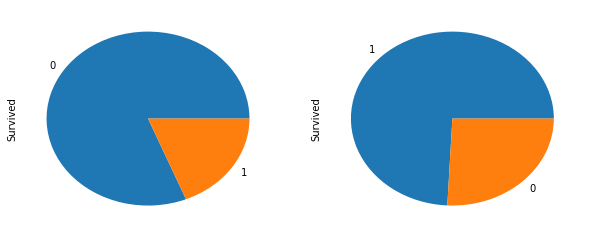

In [327]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
data.Survived[data['Sex'] == 'male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
data.Survived[data['Sex'] == 'female'].value_counts().plot(kind='pie')

In [328]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


Split the titles from the passenger names which is itself a feature but also help in calculating missing median age values

In [329]:
data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test['Name'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles_data = data['Name'].unique()
titles_test = test['Name'].unique()
titles_test

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [330]:
#统计每个头衔的年龄中位数，然后用中位数填补缺失值
data['Age'].fillna(-1, inplace=True)
test['Age'].fillna(-1, inplace=True)

medians_data = dict()
medians_test = dict()
for title1 in titles_data:
    median1 = data.Age[(data["Age"] != -1) & (data['Name'] == title1)].median()
    medians_data[title1] = median1
for title2 in titles_test:
    median2 = test.Age[(test["Age"] != -1) & (test['Name'] == title2)].median()
    medians_test[title2] = median2
print(medians_test)
for index, row in data.iterrows():
    if row['Age'] == -1:
        data.loc[index, 'Age'] = medians_data[row['Name']]
for index, row in test.iterrows():
    if row['Age'] == -1:
        test.loc[index, 'Age'] = medians_test[row['Name']]
test.head()

{'Master': 7.0, 'Rev': 35.5, 'Mrs': 36.5, 'Dona': 39.0, 'Dr': 53.0, 'Ms': nan, 'Miss': 22.0, 'Mr': 28.5, 'Col': 50.0}


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


    Pclass Name  Sex  Age  SibSp  Parch  Ticket  Fare Cabin Embarked
88       3   Ms    0  NaN      0      0  364856  7.75   NaN        Q


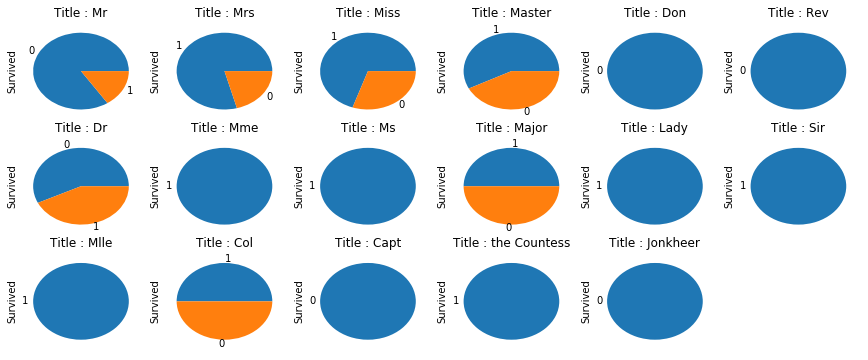

In [331]:
fig = plt.figure(figsize=(15,6))
print(test[test['Name'] == 'Ms'])
i=1
for title in data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    data.Survived[data['Name'] == title].value_counts().plot(kind='pie')
    i += 1

Transform the titles to numeric values such that the magnitude has a somewhat linear relationship with survival
Alongwith transformation, the values need to be scaled down since some models like Neural nets are very sensitive to data which is not properly scaled

In [332]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

data['Name'] = data['Name'].apply(lambda x: replacement.get(x))
test['Name'] = test['Name'].apply(lambda x: replacement.get(x))
test['Name'].fillna(0, inplace=True)
from sklearn.preprocessing import StandardScaler
data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))
test['Name'] = StandardScaler().fit_transform(test['Name'].values.reshape(-1, 1))

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [333]:
data.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,22.0,1,0,A/5 21171,NaN,S
1,1,38.0,1,0,PC 17599,C85,C
2,3,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,35.0,1,0,113803,C123,S
4,3,35.0,0,0,373450,NaN,S


In [334]:
data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))
test['Age'].fillna(18, inplace = True)
test['Age'] = StandardScaler().fit_transform(test['Age'].values.reshape(-1, 1))

Similar approach is needed for calculating missing fares according to the ticket class

In [335]:
data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in data['Pclass'].unique():
    median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in data.iterrows():
    if row['Fare'] == -1:
        data.loc[index, 'Fare'] = medians[row['Pclass']]
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))
test['Fare'].fillna(-1, inplace=True)
medians1 = dict()
for pclass in test['Pclass'].unique():
    median = test.Fare[(test["Fare"] != -1) & (test['Pclass'] == pclass)].median()
    medians1[pclass] = median
for index, row in test.iterrows():
    if row['Fare'] == -1:
        test.loc[index, 'Fare'] = medians[row['Pclass']]
test['Fare'] = StandardScaler().fit_transform(test['Fare'].values.reshape(-1, 1))

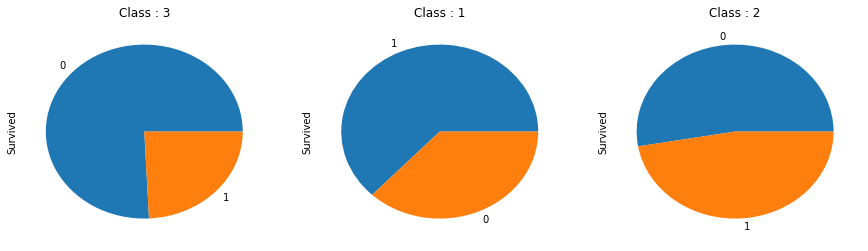

In [336]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    data.Survived[data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [337]:
data['Pclass'] = StandardScaler().fit_transform(data['Pclass'].values.reshape(-1, 1))
test['Pclass'] = StandardScaler().fit_transform(test['Pclass'].values.reshape(-1, 1))

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


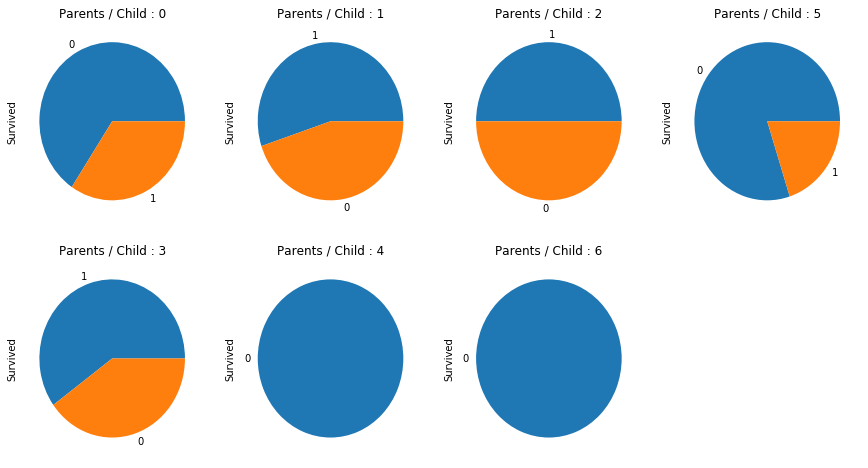

In [338]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    data.Survived[data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [339]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
data['Parch'] = data['Parch'].apply(lambda x: replacement.get(x))
data['Parch'] = StandardScaler().fit_transform(data['Parch'].values.reshape(-1, 1))
test['Parch'] = test['Parch'].apply(lambda x: replacement.get(x))
test['Parch'].fillna(0, inplace=True)
test['Parch'] = StandardScaler().fit_transform(test['Parch'].values.reshape(-1, 1))

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [340]:
data.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [ ]:
data['Embarked'].value_counts()

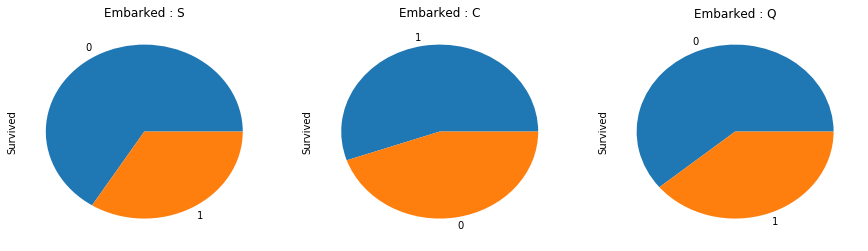

In [341]:
data['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in data['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    data.Survived[data['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [342]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
data['Embarked'] = StandardScaler().fit_transform(data['Embarked'].values.reshape(-1, 1))
data.head()['Embarked']
test['Embarked'] = test['Embarked'].apply(lambda x: replacement.get(x))
test['Embarked'] = StandardScaler().fit_transform(test['Embarked'].values.reshape(-1, 1))
test.head()['Embarked']

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0    0.470915
1   -0.700767
2    0.470915
3   -0.700767
4   -0.700767
Name: Embarked, dtype: float64

In [343]:
data['SibSp'].unique()
test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [ ]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in data['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    data.Survived[data['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [344]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

data['SibSp'] = data['SibSp'].apply(lambda x: replacement.get(x))
data['SibSp'] = StandardScaler().fit_transform(data['SibSp'].values.reshape(-1, 1))
data.head()['SibSp']
test['SibSp'] = test['SibSp'].apply(lambda x: replacement.get(x))
test['SibSp'] = StandardScaler().fit_transform(test['SibSp'].values.reshape(-1, 1))
test.head()['SibSp']

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0   -0.525887
1    1.538159
2   -0.525887
3   -0.525887
4    1.538159
Name: SibSp, dtype: float64

In [345]:
data['Cabin'].fillna('U', inplace=True)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
data['Cabin'].unique()
test['Cabin'].fillna('U', inplace=True)
test['Cabin'] = test['Cabin'].apply(lambda x: x[0])
test['Cabin'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [ ]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in data['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    data.Survived[data['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [346]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
data['Cabin'] = StandardScaler().fit_transform(data['Cabin'].values.reshape(-1, 1))
data.head()['Cabin']
test['Cabin'] = test['Cabin'].apply(lambda x: replacement.get(x))
test['Cabin'] = StandardScaler().fit_transform(test['Cabin'].values.reshape(-1, 1))
test.head()['Cabin']

/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0   -0.478344
1   -0.478344
2   -0.478344
3   -0.478344
4   -0.478344
Name: Cabin, dtype: float64

In [ ]:
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
survived = data['Survived']
data.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.2, random_state=42)

In [348]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]
predicts = []
for model in models:
    i = 0 
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)
    StackingSubmission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': model.predict(test) })
    StackingSubmission.to_csv("predict{}.csv".format(i), index=False)
    i += 1

0.8268156424581006
0.8156424581005587


/Users/gaochen3/.pyenv/versions/3.5.1/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
